## Working with PEtab
[PEtab](https://petab.readthedocs.io/en/latest/) is a standard file format, describing parameter estimation problems. While COPASI does not support the full feature set of PEtab, with basico we can import PEtab problems, and analyze them. THis is an optional dependency, that is only installed, when basico is installed using: 

```bash
pip install copasi-basico[petab]
```

assuming this is done, and that a petab problem is in the local directory, you can load it and analyze it like so:

In [1]:
from basico import *
import basico.petab

within the `basico.petab` module we define a PetabSimulator, that automatically imports a PEtab file, and transforms the experimental data files as needed by COPASI. It implementes the `petab.simulate.Simulator` interface that can be used for other libraries using libpetab. 

So lets start by loading a PEtab problem

In [2]:
from petab import Problem
pp = Problem.from_yaml('./Elowitz_Nature2000/Elowitz_Nature2000.yaml')

now lets instantiate the simulator with: 

 * `pp`: the petab problem
 * `working_dir`: the directory where temp files can be stored
 
we are not specifying any additional optimization settings, so the parameter estimation task will be set to 'Current Solution Statistics', meaning that no actual optimization will be performed: 

In [3]:
sim = basico.petab.PetabSimulator(pp, working_dir='./temp_dir/')

now lets simulate it: 

In [4]:
df = sim.simulate()

At this point the file can be opened directly in COPASI using `open_copasi()`, or here I use the visualization library from libpetab, to plot the problem and simulation obtained: 

In [5]:
import petab.visualize

{'plot1': <Axes: xlabel='time', ylabel='values'>}

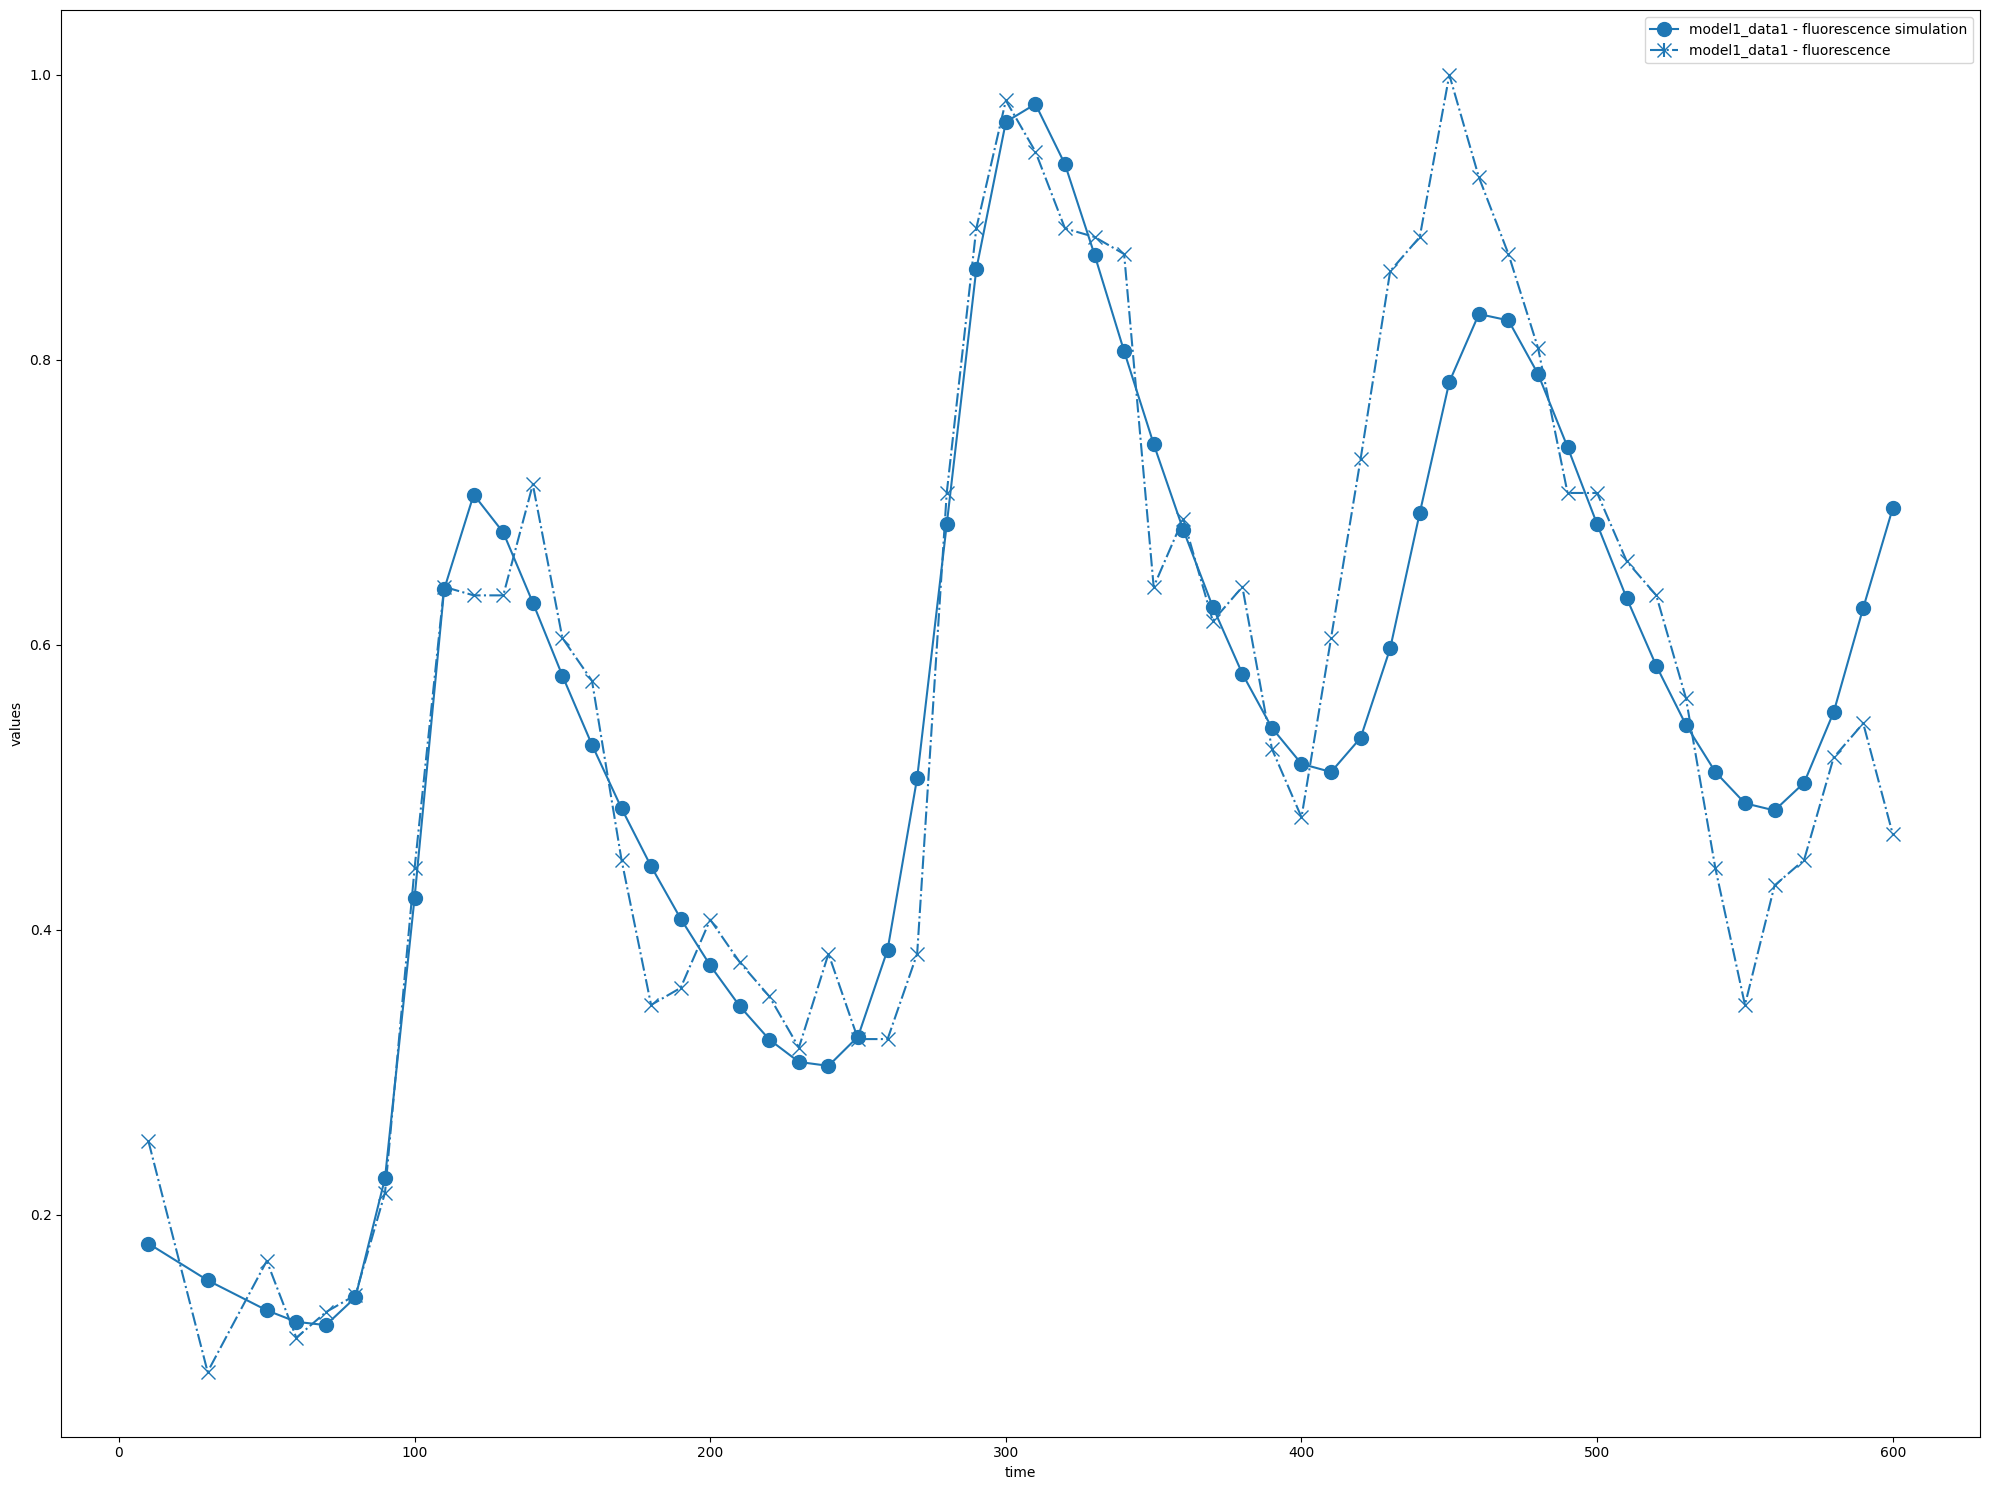

In [6]:
petab.visualize.plot_problem(pp, simulations_df=df)

## Model Selection
Using the `petab_select` library, model selection is also wrapped within basico, for a more complex example see the [FAMOS demonstration](FAMOS_ModelSelection.ipynb). It will instantiate the petab problem, and explore all models according to the specified method: 

In [7]:
import petab_select

In [8]:
problem = petab_select.Problem.from_yaml('./model_selection/petab_select_problem.yaml')

evaluating the problem will perform the calibrations. While COPASI uses different errorscaling than other PEtab scales, we would expect the same models being chosen:

In [9]:
best = basico.petab.evaluate_problem(problem, temp_dir='./temp_dir/', delete_temp_files=False)
print(best.model_subspace_id)


M1_3


at this point the best model returned could be turned into its own PEtab problem, and simulated as above: 

{'plot1': <Axes: xlabel='time', ylabel='values'>}

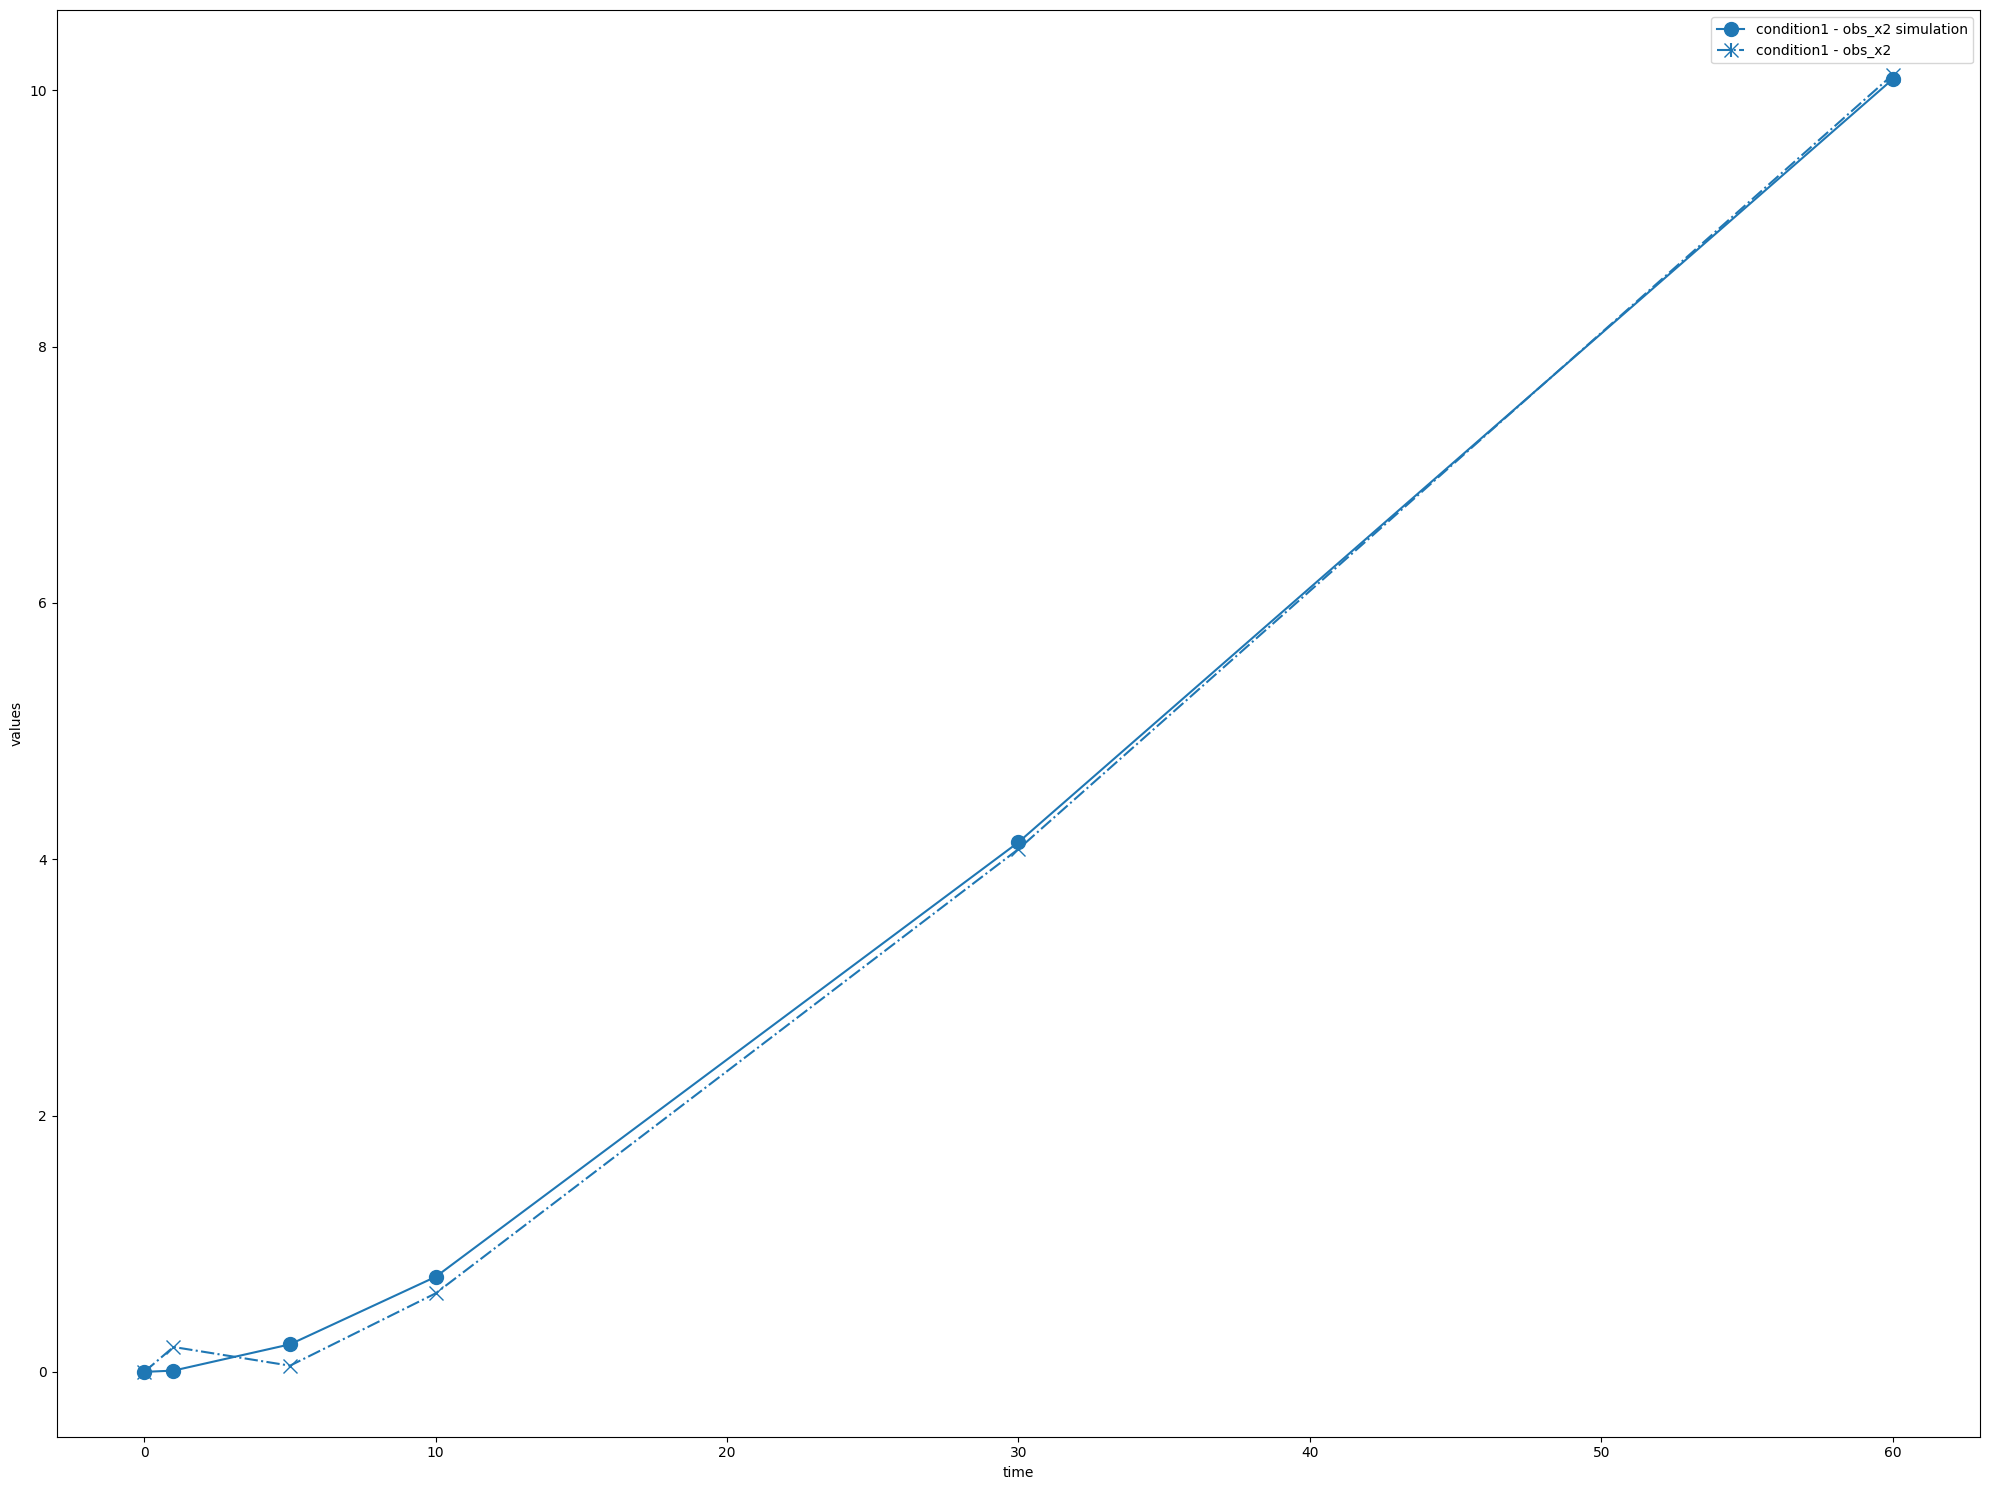

In [10]:
pp = best.to_petab()['petab_problem']
sim = basico.petab.PetabSimulator(pp, working_dir='./temp_dir/')
petab.visualize.plot_problem(pp, simulations_df=sim.simulate())

finally lets clean up after ourselfes and delete all the temp files generated: 

In [11]:
import shutil
shutil.rmtree('./temp_dir')